In [1]:
import torch
import numpy as np

In [2]:
y = [4.209015  , 6.0251656 , 6.586659  , 1.0785204 , 5.323591,   2.9644287, 8.885769  , 9.895647  ,  6.464806  , 0.18034637, 1.2534696]
x = [34.552039 , 74.45411  , 80.987488 ,  3.458197 , 56.4778655, 26.98163  , 95.79415  , 106.228316 , 61.169422 , 1.089516 , 8.962632]

In [3]:
y = torch.tensor(y)
x = torch.tensor(x)
x

tensor([ 34.5520,  74.4541,  80.9875,   3.4582,  56.4779,  26.9816,  95.7942,
        106.2283,  61.1694,   1.0895,   8.9626])

In [4]:
def model(x, w, b):
    return w * x + b

In [5]:
def loss_fn(yy, y):
    squared_diffs = (yy - y)**2
    return squared_diffs.mean()

In [6]:
def dloss_fn(yy, y):
    dsq_diffs = 2 * (yy - y) / yy.size(0)
    return dsq_diffs 

In [7]:
def dmodel_dw(x, w, b):
    return x

In [8]:
def dmodel_db(x, w, b):
    return 1.0

In [9]:
def grad_fn(x, y, yy, w, b):
    dloss_dyy = dloss_fn(yy,y)
    dloss_dw = dloss_dyy * dmodel_dw(x, w, b)
    dloss_db = dloss_dyy * dmodel_db(x, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [10]:
def training_loop(n_epochs, learning_rate, params, x, y):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        yy = model(x, w, b)
        loss = loss_fn(yy, y)                
        grad = grad_fn(x, y, yy, w, b)        
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        print('\t Params: ', params)
        print('\t Grad: ', grad)
        
    return params

In [11]:
x = x * 0.1
x

tensor([ 3.4552,  7.4454,  8.0987,  0.3458,  5.6478,  2.6982,  9.5794, 10.6228,
         6.1169,  0.1090,  0.8963])

In [12]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    x = x,
    y = y)

Epoch 1, Loss 0.622568
	 Params:  tensor([ 0.9400, -0.0039])
	 Grad:  tensor([5.9979, 0.3906])
Epoch 2, Loss 0.399406
	 Params:  tensor([ 0.9257, -0.0017])
	 Grad:  tensor([ 1.4320, -0.2172])
Epoch 3, Loss 0.385859
	 Params:  tensor([0.9220, 0.0018])
	 Grad:  tensor([ 0.3730, -0.3561])
Epoch 4, Loss 0.383605
	 Params:  tensor([0.9207, 0.0057])
	 Grad:  tensor([ 0.1271, -0.3863])
Epoch 5, Loss 0.381978
	 Params:  tensor([0.9200, 0.0096])
	 Grad:  tensor([ 0.0698, -0.3913])
Epoch 6, Loss 0.380404
	 Params:  tensor([0.9194, 0.0135])
	 Grad:  tensor([ 0.0563, -0.3904])
Epoch 7, Loss 0.378853
	 Params:  tensor([0.9189, 0.0174])
	 Grad:  tensor([ 0.0529, -0.3883])
Epoch 8, Loss 0.377323
	 Params:  tensor([0.9184, 0.0212])
	 Grad:  tensor([ 0.0518, -0.3858])
Epoch 9, Loss 0.375813
	 Params:  tensor([0.9179, 0.0251])
	 Grad:  tensor([ 0.0513, -0.3832])
Epoch 10, Loss 0.374323
	 Params:  tensor([0.9174, 0.0289])
	 Grad:  tensor([ 0.0509, -0.3807])
Epoch 11, Loss 0.372852
	 Params:  tensor([0.91

	 Grad:  tensor([ 0.0083, -0.0620])
Epoch 284, Loss 0.265897
	 Params:  tensor([0.8534, 0.5074])
	 Grad:  tensor([ 0.0082, -0.0616])
Epoch 285, Loss 0.265859
	 Params:  tensor([0.8533, 0.5080])
	 Grad:  tensor([ 0.0082, -0.0612])
Epoch 286, Loss 0.265821
	 Params:  tensor([0.8532, 0.5086])
	 Grad:  tensor([ 0.0081, -0.0608])
Epoch 287, Loss 0.265783
	 Params:  tensor([0.8532, 0.5092])
	 Grad:  tensor([ 0.0081, -0.0604])
Epoch 288, Loss 0.265746
	 Params:  tensor([0.8531, 0.5098])
	 Grad:  tensor([ 0.0080, -0.0600])
Epoch 289, Loss 0.265710
	 Params:  tensor([0.8530, 0.5104])
	 Grad:  tensor([ 0.0080, -0.0596])
Epoch 290, Loss 0.265674
	 Params:  tensor([0.8529, 0.5110])
	 Grad:  tensor([ 0.0079, -0.0592])
Epoch 291, Loss 0.265638
	 Params:  tensor([0.8528, 0.5116])
	 Grad:  tensor([ 0.0079, -0.0588])
Epoch 292, Loss 0.265603
	 Params:  tensor([0.8528, 0.5121])
	 Grad:  tensor([ 0.0078, -0.0584])
Epoch 293, Loss 0.265569
	 Params:  tensor([0.8527, 0.5127])
	 Grad:  tensor([ 0.0078, -0.0

	 Grad:  tensor([ 0.0013, -0.0098])
Epoch 562, Loss 0.263055
	 Params:  tensor([0.8430, 0.5852])
	 Grad:  tensor([ 0.0013, -0.0097])
Epoch 563, Loss 0.263054
	 Params:  tensor([0.8430, 0.5853])
	 Grad:  tensor([ 0.0013, -0.0096])
Epoch 564, Loss 0.263053
	 Params:  tensor([0.8430, 0.5854])
	 Grad:  tensor([ 0.0013, -0.0096])
Epoch 565, Loss 0.263052
	 Params:  tensor([0.8430, 0.5854])
	 Grad:  tensor([ 0.0013, -0.0095])
Epoch 566, Loss 0.263051
	 Params:  tensor([0.8429, 0.5855])
	 Grad:  tensor([ 0.0013, -0.0095])
Epoch 567, Loss 0.263050
	 Params:  tensor([0.8429, 0.5856])
	 Grad:  tensor([ 0.0013, -0.0094])
Epoch 568, Loss 0.263049
	 Params:  tensor([0.8429, 0.5857])
	 Grad:  tensor([ 0.0012, -0.0093])
Epoch 569, Loss 0.263048
	 Params:  tensor([0.8429, 0.5858])
	 Grad:  tensor([ 0.0012, -0.0093])
Epoch 570, Loss 0.263047
	 Params:  tensor([0.8429, 0.5859])
	 Grad:  tensor([ 0.0012, -0.0092])
Epoch 571, Loss 0.263047
	 Params:  tensor([0.8429, 0.5860])
	 Grad:  tensor([ 0.0012, -0.0

	 Params:  tensor([0.8413, 0.5977])
	 Grad:  tensor([ 0.0002, -0.0013])
Epoch 862, Loss 0.262984
	 Params:  tensor([0.8413, 0.5977])
	 Grad:  tensor([ 0.0002, -0.0013])
Epoch 863, Loss 0.262984
	 Params:  tensor([0.8413, 0.5977])
	 Grad:  tensor([ 0.0002, -0.0013])
Epoch 864, Loss 0.262984
	 Params:  tensor([0.8413, 0.5978])
	 Grad:  tensor([ 0.0002, -0.0013])
Epoch 865, Loss 0.262984
	 Params:  tensor([0.8413, 0.5978])
	 Grad:  tensor([ 0.0002, -0.0013])
Epoch 866, Loss 0.262984
	 Params:  tensor([0.8413, 0.5978])
	 Grad:  tensor([ 0.0002, -0.0013])
Epoch 867, Loss 0.262984
	 Params:  tensor([0.8413, 0.5978])
	 Grad:  tensor([ 0.0002, -0.0013])
Epoch 868, Loss 0.262984
	 Params:  tensor([0.8413, 0.5978])
	 Grad:  tensor([ 0.0002, -0.0013])
Epoch 869, Loss 0.262984
	 Params:  tensor([0.8413, 0.5978])
	 Grad:  tensor([ 0.0002, -0.0013])
Epoch 870, Loss 0.262984
	 Params:  tensor([0.8413, 0.5978])
	 Grad:  tensor([ 0.0002, -0.0013])
Epoch 871, Loss 0.262984
	 Params:  tensor([0.8413, 0.5

	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.1458e-05, -1.8132e-04])
Epoch 1162, Loss 0.262982
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.2173e-05, -1.8009e-04])
Epoch 1163, Loss 0.262982
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 1.9729e-05, -1.7903e-04])
Epoch 1164, Loss 0.262982
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.4378e-05, -1.7730e-04])
Epoch 1165, Loss 0.262982
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.3663e-05, -1.7621e-04])
Epoch 1166, Loss 0.262982
	 Params:  tensor([0.8411, 0.5994])
	 Grad:  tensor([ 2.4319e-05, -1.7497e-04])
Epoch 1167, Loss 0.262982
	 Params:  tensor([0.8411, 0.5995])
	 Grad:  tensor([ 2.5153e-05, -1.7369e-04])
Epoch 1168, Loss 0.262982
	 Params:  tensor([0.8411, 0.5995])
	 Grad:  tensor([ 2.5868e-05, -1.7251e-04])
Epoch 1169, Loss 0.262982
	 Params:  tensor([0.8411, 0.5995])
	 Grad:  tensor([ 2.5392e-05, -1.7134e-04])
Epoch 1170, Loss 0.262983
	 Params:  tensor([0.8411, 0.5995])
	 Grad:  t

	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 3.7551e-06, -2.4900e-05])
Epoch 1461, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 4.1723e-07, -2.5116e-05])
Epoch 1462, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 7.7486e-07, -2.4900e-05])
Epoch 1463, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 3.2783e-06, -2.4356e-05])
Epoch 1464, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 3.5167e-06, -2.4281e-05])
Epoch 1465, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 2.2054e-06, -2.4281e-05])
Epoch 1466, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 2.4438e-06, -2.4058e-05])
Epoch 1467, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 5.1856e-06, -2.3499e-05])
Epoch 1468, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  tensor([ 2.9206e-06, -2.3708e-05])
Epoch 1469, Loss 0.262982
	 Params:  tensor([0.8411, 0.5997])
	 Grad:  t

	 Grad:  tensor([ 7.1526e-07, -3.0473e-06])
Epoch 1757, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 1758, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 1759, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 1760, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 1761, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 1762, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 1763, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 1764, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 1765, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Ep

	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2055, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2056, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2057, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2058, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2059, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2060, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2061, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2062, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2063, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Ep

	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2353, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2354, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2355, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2356, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2357, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2358, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2359, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2360, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2361, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Ep

	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2631, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2632, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2633, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2634, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2635, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2636, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2637, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2638, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2639, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  t

	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2913, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2914, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2915, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2916, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2917, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2918, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2919, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2920, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 2921, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Ep

	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3202, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3203, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3204, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3205, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3206, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3207, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3208, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3209, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3210, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Ep

	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3489, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3490, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3491, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3492, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3493, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3494, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3495, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3496, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3497, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  t

	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3777, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3778, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3779, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3780, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3781, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3782, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3783, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3784, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 3785, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Ep

Epoch 4063, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4064, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4065, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4066, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4067, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4068, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4069, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4070, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4071, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4072, Loss 0.262982
	 Params:  tensor([0

Epoch 4350, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4351, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4352, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4353, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4354, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4355, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4356, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4357, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4358, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4359, Loss 0.262982
	 Params:  tensor([0

Epoch 4639, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4640, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4641, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4642, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4643, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4644, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4645, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4646, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4647, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4648, Loss 0.262982
	 Params:  tensor([0

	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4905, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4906, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4907, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4908, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4909, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4910, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4911, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4912, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  tensor([ 2.3842e-06, -2.7493e-06])
Epoch 4913, Loss 0.262982
	 Params:  tensor([0.8410, 0.5997])
	 Grad:  t

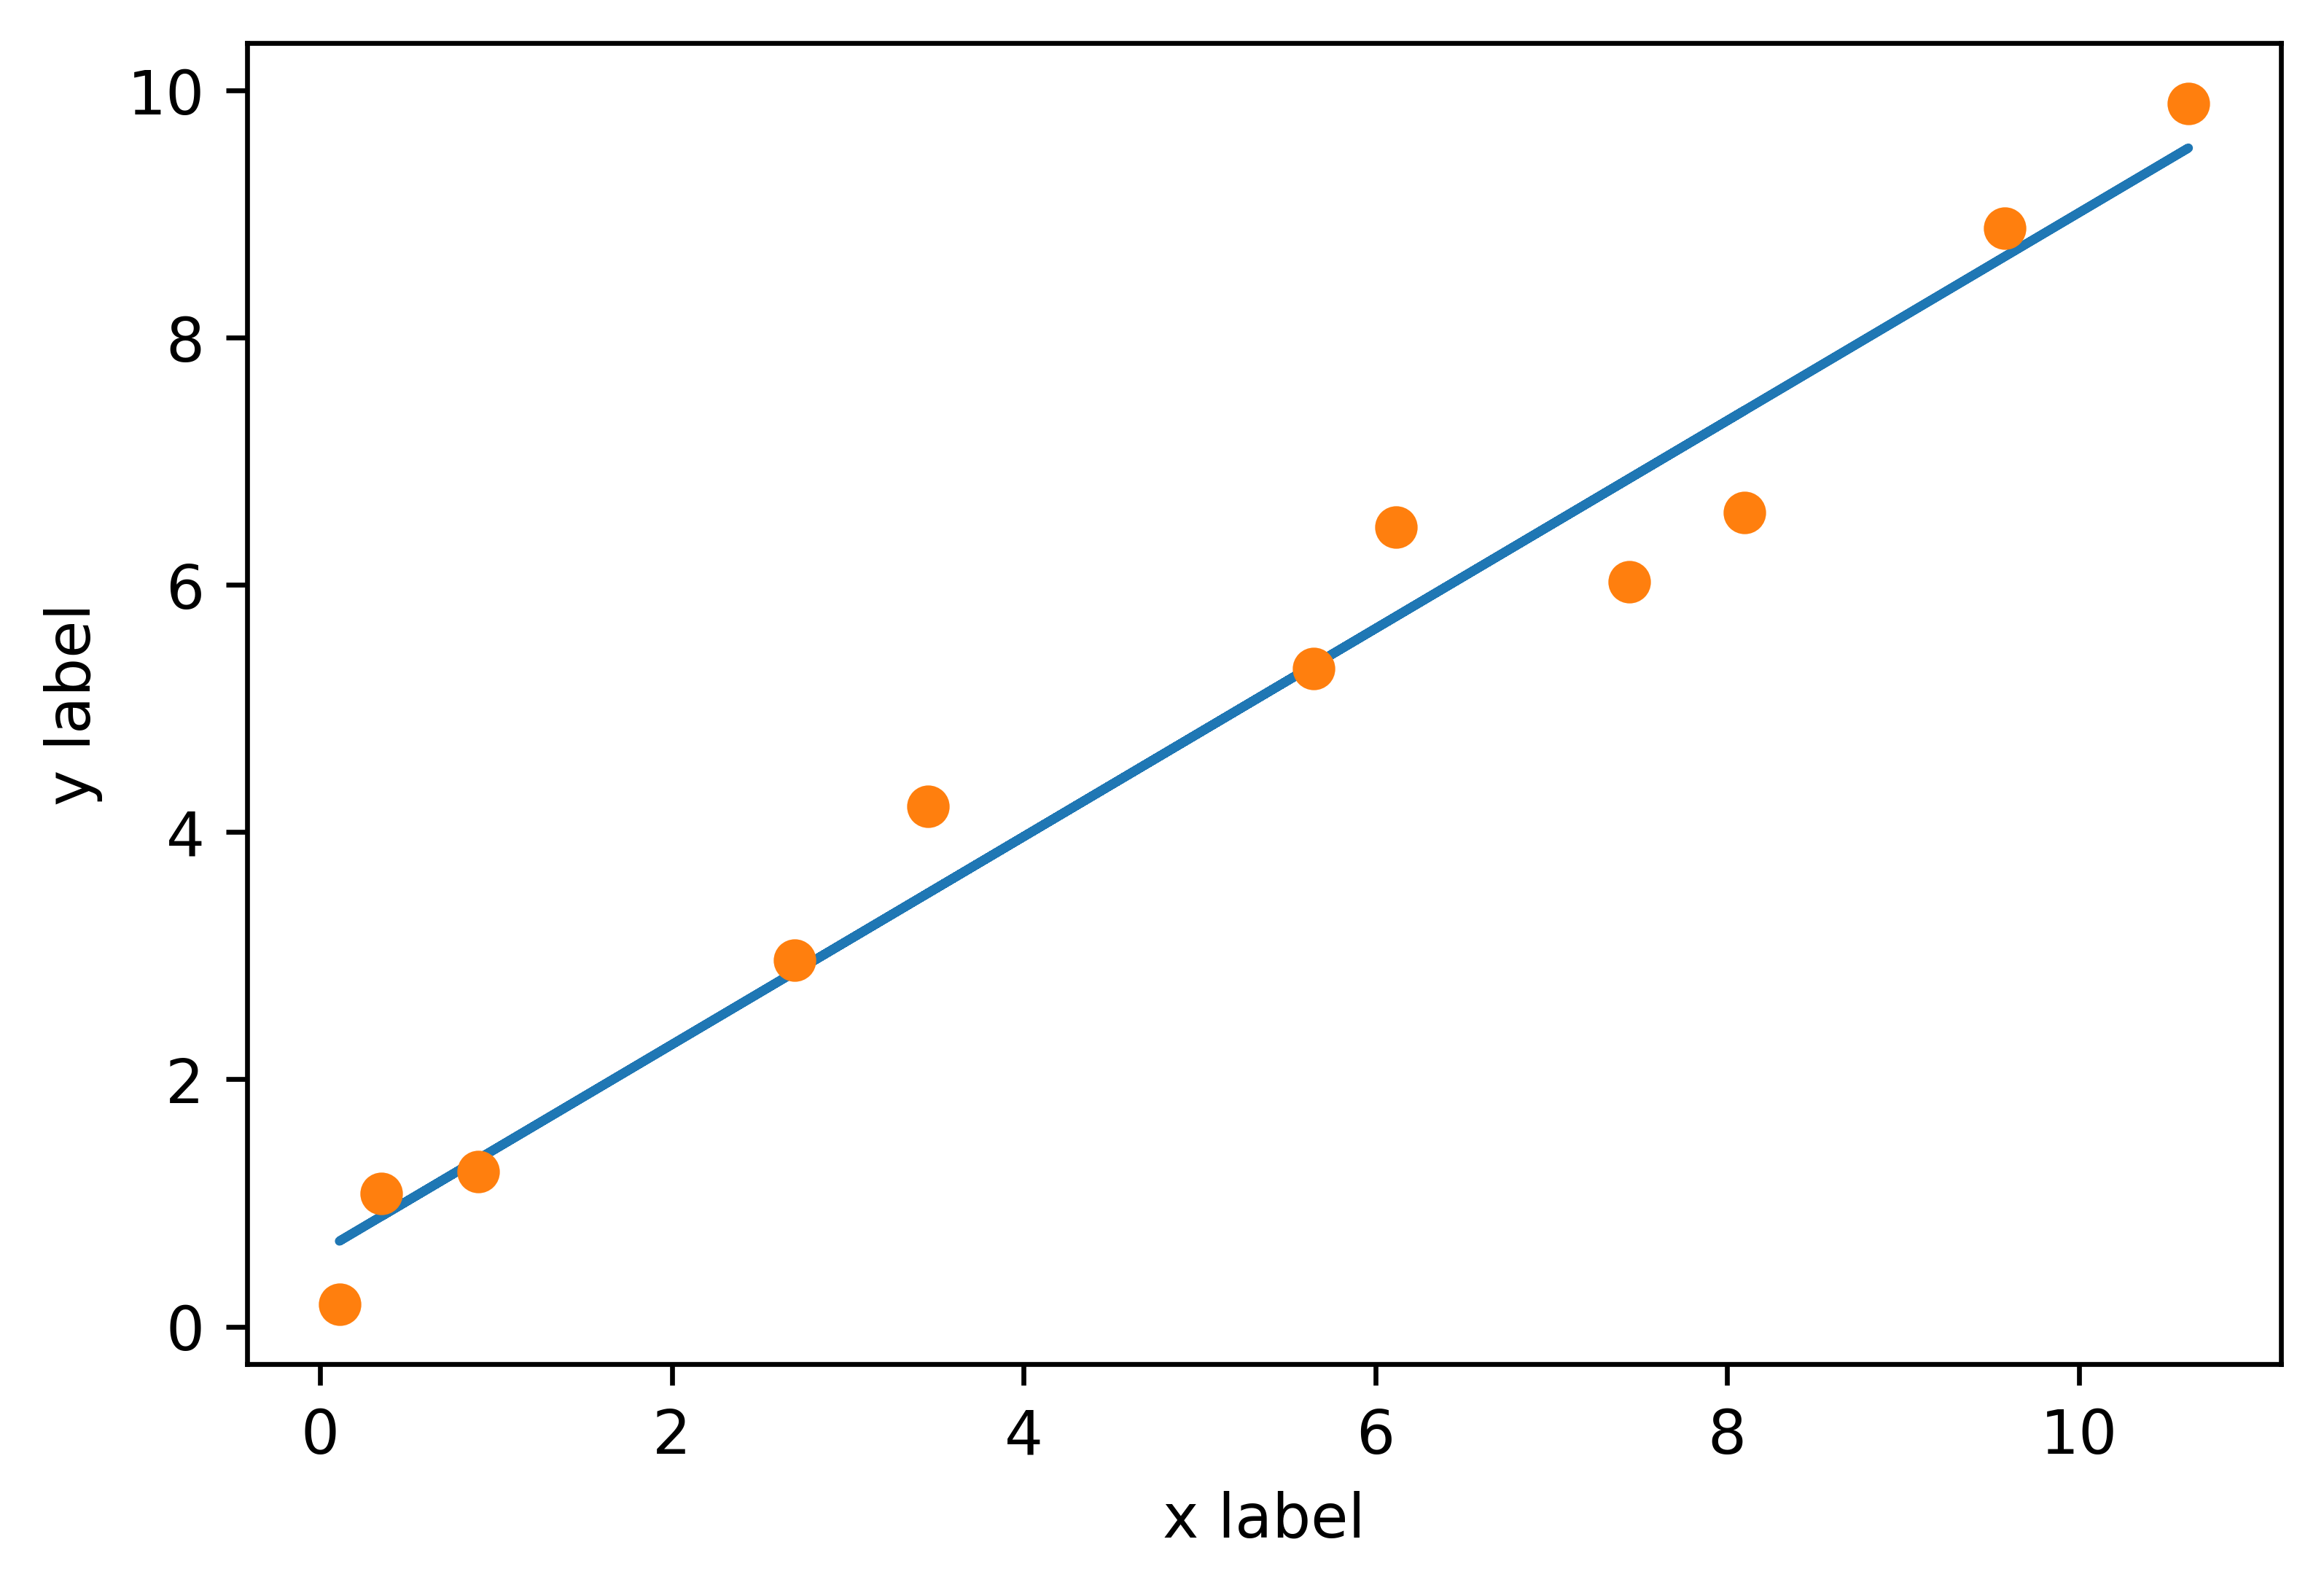

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
yy = model(x, *params)
fig = plt.figure(dpi=600)
plt.xlabel("x label")
plt.ylabel("y label")
plt.plot(x.numpy(), yy.detach().numpy())
plt.plot(x.numpy(), y.numpy(), 'o')
plt.savefig("dl_ch1t2_plot01.png", format="png")